In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

from utils import *
from plots import *

pd.set_option('display.max_columns', None)

with open('config.json') as f:
    config = json.load(f)

In [2]:
# Cache directory path, it determines where downloaded data will be stored
manifest_path = os.path.join(config['cache_dir'], "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [5]:
session_id = config['analysis_object']['session_id']
ecephys_structure_acronym = config['analysis_object']['ecephys_structure_acronym']
session = cache.get_session_data(session_id)

In [8]:
output_dir = config['output_dir']
session_dir = os.path.join(output_dir, f'session_{session_id:d}')
info_file = os.path.join(output_dir, f'session_{session_id:d}_{ecephys_structure_acronym:s}.json')
with open(info_file) as f:
    info = json.load(f)
# print(json.dumps(info, indent=4))

probe_id = info['probe_id']

In [10]:
csd = session.get_current_source_density(probe_id)
csd

<xarray.DataArray 'CSD' (virtual_channel_index: 384, time: 875)>
array([[  23150.79988891,   35203.92878129,   46268.95784115, ...,
         -33851.70394671,  -29968.03760819,  -25858.88504902],
       [ -14280.2283863 ,  -15633.18016032,  -16893.54748099, ...,
          26550.06877998,   21294.26106552,   15669.18660654],
       [ -20626.0670579 ,  -23681.9669308 ,  -26587.37953627, ...,
          41811.2563321 ,   32991.84368722,   23554.59325956],
       ...,
       [    675.54080814,    2576.85302398,    4399.16517111, ...,
          -3341.88879386,   -3700.43920997,   -3950.50399206],
       [  55726.35164628,   57111.83725515,   58609.05634352, ...,
        -165522.76663632, -141745.97159151, -116710.42439616],
       [ -49500.32282268,  -50983.9305591 ,  -52664.15691067, ...,
         163814.64574181,  143159.85435337,  121120.97908205]])
Coordinates:
  * virtual_channel_index  (virtual_channel_index) int32 0 1 2 3 ... 381 382 383
  * time                   (time) float64 -0.1 -0.0996 -0.0992 ... 0.2492 0.2496
    vertical_position      (virtual_channel_index) float64 0.0 10.0 ... 3.83e+03
    horizontal_position    (virtual_channel_index) float64 24.0 24.0 ... 24.0

C:\Users\ziaochen\AppData\Local\Temp\ipykernel_4916\2899902217.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
C:\Users\ziaochen\AppData\Local\Temp\ipykernel_4916\2899902217.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(csd["time"], csd["vertical_position"], csd.data)
C:\Users\ziaochen\AppData\Local\Temp\ipykernel_4916\2899902217.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or 

Text(0, 0.5, 'vertical position (um)')

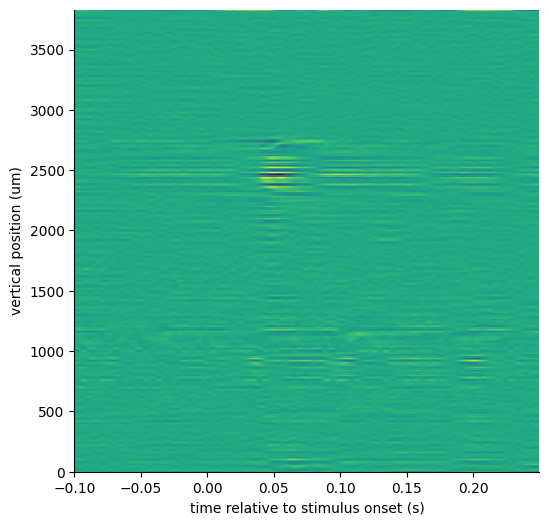

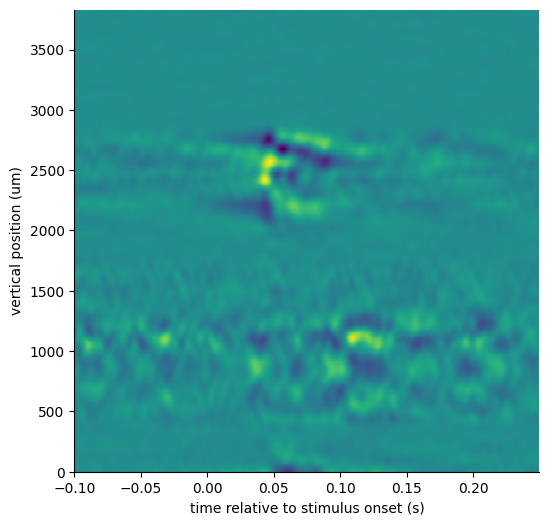

In [31]:
from scipy.ndimage.filters import gaussian_filter

fig, ax = plt.subplots(figsize=(6, 6))
ax.pcolor(csd["time"], csd["vertical_position"], csd.data)
ax.set_xlabel("time relative to stimulus onset (s)")
ax.set_ylabel("vertical position (um)")

filtered_csd = gaussian_filter(csd.data, sigma=(5, 1))

fig, ax = plt.subplots(figsize=(6, 6))
ax.pcolor(csd["time"], csd["vertical_position"], filtered_csd)
ax.set_xlabel("time relative to stimulus onset (s)")
ax.set_ylabel("vertical position (um)")